# Final Project

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

In [4]:
#Importing the data and readingng it
data = pd.read_csv("covid_country_stats.csv")
data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


### Statistical Summary

In [5]:
# Sum of Deaths
data=data.astype({"Deaths":float})
data_deaths = data["Deaths"].sum()
print("The total number of recorded deaths by Covid is", data_deaths)

The total number of recorded deaths by Covid is 43384903.0


In [6]:
# Average number of active cases
data = data.astype({"Active":float})
data_active = data["Active"].mean()
data_active = round(data_active, 2)
print("The average number of active cases in the overal period from January 2020 to July 2020 is", data_active)

The average number of active cases in the overal period from January 2020 to July 2020 is 11284.43


### Relationships

In [7]:
# Average number of deaths by country in Europe
data_europe_deaths = (data[data["WHO Region"] == "Europe"].groupby(["Country/Region"])["Deaths"].mean()/ 0.617021) * 100
print("This is the percentages of the average death from covid compared to the lowest values which is Liechtenstein")
print()
print(data_europe_deaths)

This is the percentages of the average death from covid compared to the lowest values which is Liechtenstein

Country/Region
Albania                   4.920692e+03
Andorra                   4.675002e+03
Armenia                   2.335260e+04
Austria                   6.154313e+04
Azerbaijan                1.231207e+04
Belarus                   2.447501e+04
Belgium                   8.307581e+05
Bosnia and Herzegovina    1.411466e+04
Bulgaria                  1.521897e+04
Croatia                   8.941383e+03
Cyprus                    1.691380e+03
Czechia                   2.876208e+04
Denmark                   5.224313e+04
Estonia                   5.884485e+03
Finland                   2.615346e+04
France                    2.628039e+06
Georgia                   1.091380e+03
Germany                   7.511400e+05
Greece                    1.656466e+04
Greenland                 0.000000e+00
Holy See                  0.000000e+00
Hungary                   4.401123e+04
Iceland          

In [8]:
#Top 10 confirmed cases Americas vs Africa
data_confrimed_americas = data[data["WHO Region"] == "Americas"].groupby(["Country/Region"])["New cases"].sum()
data_confrimed_asia = data[data["WHO Region"] == "Africa"].groupby(["Country/Region"])["New cases"].sum()
print(data_confrimed_asia.sort_values().tail(10), data_confrimed_americas.sort_values().tail(10))


Country/Region
Madagascar         9697
Senegal            9764
Ethiopia          14547
Cote d'Ivoire     15655
Cameroon          17110
Kenya             17975
Algeria           27973
Ghana             33624
Nigeria           41180
South Africa     452529
Name: New cases, dtype: int64 Country/Region
Bolivia        71181
Ecuador        84274
Canada        116458
Argentina     167416
Colombia      257101
Chile         347923
Peru          389717
Mexico        395489
Brazil       2442375
US           4290258
Name: New cases, dtype: int64


In [9]:

data_americas_confirmed = data[data["WHO Region"] == "Americas"].groupby(["Country/Region"])["Confirmed"].sum()
print(data_americas_confirmed)

Country/Region
Antigua and Barbuda                      4487
Argentina                             4450658
Bahamas                                 12100
Barbados                                10652
Belize                                   2636
Bolivia                               2170351
Brazil                               89524967
Canada                                9356551
Chile                                16935654
Colombia                              6893122
Costa Rica                             347151
Cuba                                   216346
Dominica                                 2059
Dominican Republic                    2495433
Ecuador                               4678496
El Salvador                            453036
Grenada                                  2466
Guatemala                             1273708
Guyana                                  19089
Haiti                                  333181
Honduras                              1228583
Jamaica            

### Visualizations

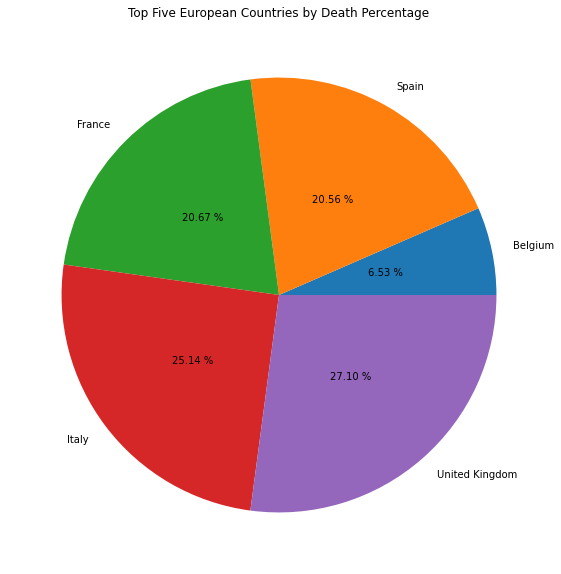

In [10]:
# 1st visualization 

# Isolate the sum of death numbers by European Region
data_europe_deaths = data[data["WHO Region"] == "Europe"].groupby(["Country/Region"])["Deaths"].sum() 
# I ploted the tail(5) of the sorted values because the .sort_values function starts from low and ends high 
x = plt.pie(data_europe_deaths.sort_values().tail(5), labels = data_europe_deaths.sort_values().tail(5).index,autopct="%.2f %%", pctdistance=0.5)
fig = plt.gcf()
fig.set_size_inches(10,10) # Here I configured the plot to be bigger and read more easily
plt.title("Top Five European Countries by Death Percentage")
plt.style.use('ggplot')
plt.show()

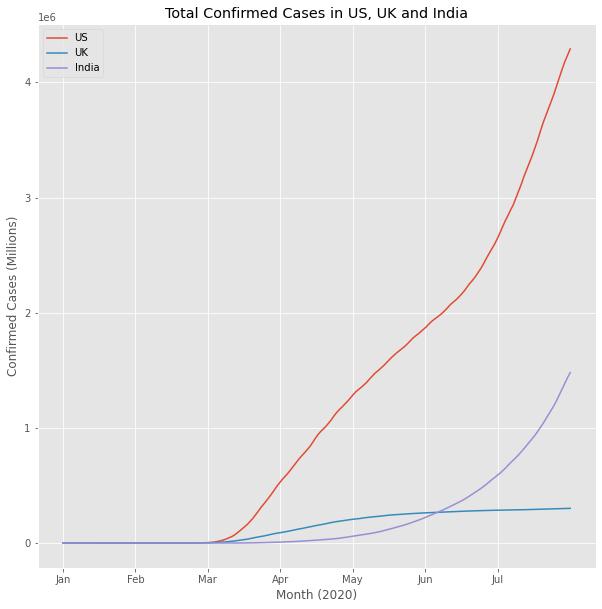

In [11]:
# 2nd Visualization

# Getting the confirmed cases and dates in its own section to islate
us = data[data["Country/Region"] == "US"].groupby(["Date"])["Confirmed"].sum()
uk = data[data["Country/Region"] == "United Kingdom"].groupby(["Date"])["Confirmed"].sum() 
ind = ger = data[data["Country/Region"] == "India"].groupby(["Date"])["Confirmed"].sum() 

# Plotting the 3 countries by the new datafram
plot1, = plt.plot(us.index, us.values)
plot2, = plt.plot(uk.index, uk.values)
plot3, = plt.plot(ind.index, ind.values)

# Formatting the graph properly
plt.xticks(np.linspace(0,187,8)[:-1], ('Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul")) # I broke down the x-axis to months instead of days
plt.legend(handles=[plot1, plot2, plot3],labels=["US", "UK", "India"])
plt.xlabel("Month (2020)")
plt.ylabel("Confirmed Cases (Millions)")
plt.title("Total Confirmed Cases in US, UK and India")
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Conclusion

For the final project I decided to choose the covid 19 data set because I felt that it had the most real world applications due to the ongoing debate in the media about the “science and statistics” that govern the politics regarding the pandemic. The summary statistics that I chose to explore were the total number of deaths and the average number of active cases per country. The relationships that I chose for the exploratory section of the assignment was the association between the average number of deaths by country in Europe and the total number of confirmed cases by countries in Americas. I decided to break the relationships down via the $.groupby()$ function by WHO Region because I think it was the best way to show the relationship between the countries and the metrics that I chose to explore. Furthermore I chose to plot both the top five countries by death percentage in Europe by sorting the values of this group and taking the top five by using the $.tail(5)$ function. For the second visualization I chose to create a line graph of three countries having the dates sectioned by month on the x-axis and the total number of confirmed cases in millions. I believe that this is the best representation to show the evolution of the confirmed cases by country because it can be applied to show the change in cases by the month which could be used in different modeling applications. Overall, I think my analysis of the data set gives a comprehensive picture of the key points of the data and is easy to understand and follow when trying to visualize the information.